In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
copper_df = pd.read_csv(r"D:/Copper_model_Project/Copper_Set.csv")

In [3]:
copper_df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
copper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# converting to suitable datatype 
copper_df['item_date'] = pd.to_datetime(copper_df['item_date'],format="%Y%m%d",errors='coerce').dt.date
copper_df['quantity tons'] = pd.to_numeric(copper_df['quantity tons'], errors='coerce')
copper_df['delivery date'] = pd.to_datetime(copper_df['delivery date'],format="%Y%m%d",errors='coerce').dt.date

In [6]:
# ‘Material_ref’ which starts with ‘00000’ value should be converted into null
copper_df['material_ref'] = copper_df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
copper_df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [7]:
# Checking the null values percentage
copper_df.isnull().sum()/len(copper_df)*100

id                0.001101
item_date         0.001651
quantity tons     0.000550
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     55.398986
product_ref       0.000000
delivery date     0.001651
selling_price     0.000550
dtype: float64

In [8]:
# material_ref has more than 55% of missing values & id is not required for model training
copper_df.drop(columns=["id", "material_ref"], inplace=True)
copper_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [9]:
copper_df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [10]:
# quantity tons & selling_price are in negative values. So we need to convert them to Nan
copper_df['quantity tons'] = copper_df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
copper_df['selling_price'] = copper_df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
copper_df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816650e+05
mean,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918124e+03
std,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.318020e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [11]:
copper_df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [12]:
# Handelling missing values
# Categorical columns
copper_df['item_date'].fillna(copper_df['item_date'].mode()[0],inplace = True)
copper_df['status'].fillna(copper_df['status'].mode()[0],inplace = True)
copper_df['delivery date'].fillna(copper_df['delivery date'].mode()[0],inplace = True)

# Numerical columns
copper_df['quantity tons'].fillna(copper_df['quantity tons'].median(),inplace = True)
copper_df['customer'].fillna(copper_df['customer'].median(),inplace = True)
copper_df['country'].fillna(copper_df['country'].median(),inplace = True)
copper_df['application'].fillna(copper_df['application'].median(),inplace = True)
copper_df['thickness'].fillna(copper_df['thickness'].median(),inplace = True)
copper_df['selling_price'].fillna(copper_df['selling_price'].median(),inplace = True)

In [13]:
copper_df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [14]:
copper_df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

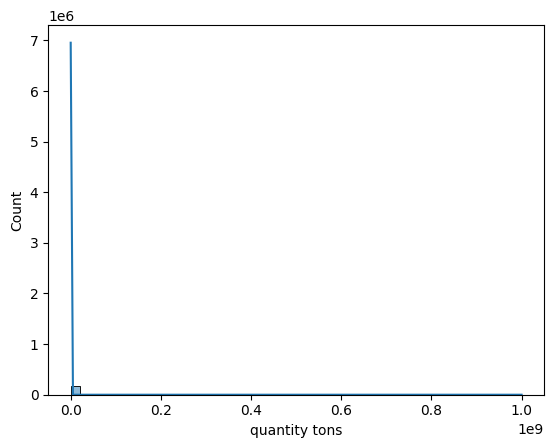

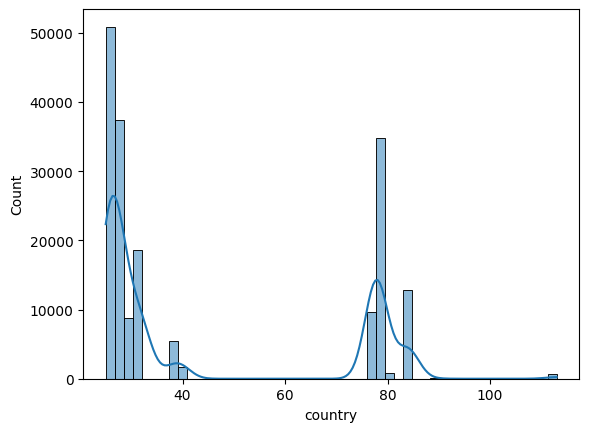

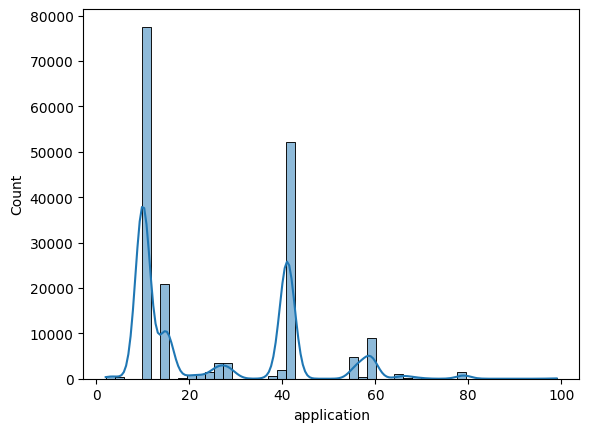

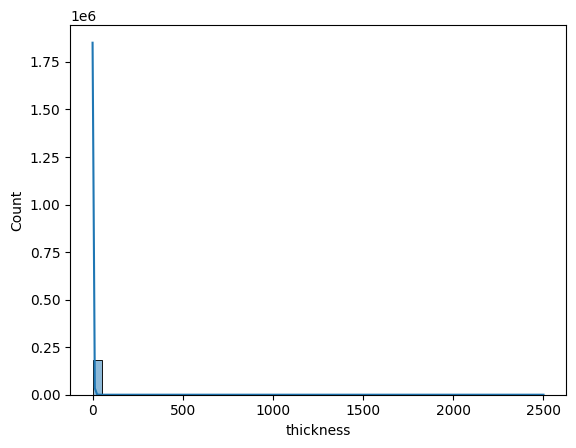

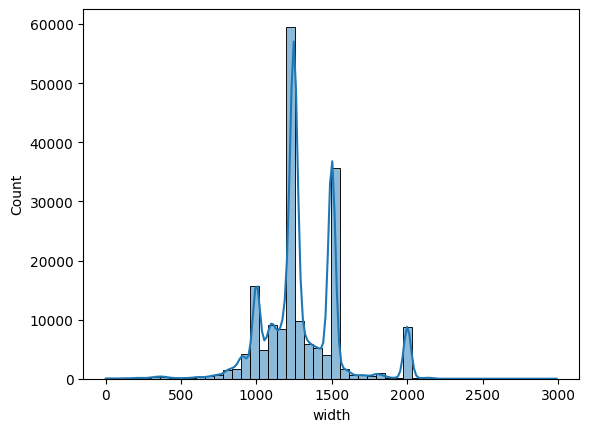

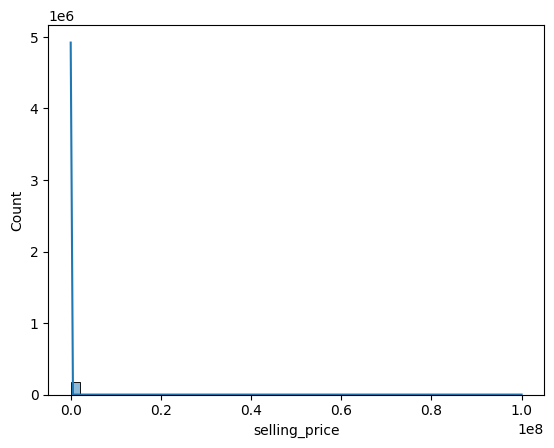

In [15]:
# Checking the skewness
for i in ["quantity tons","country","application","thickness","width","selling_price"]:
    sns.histplot(copper_df[i],kde=True,bins=50)
    plt.show()

In [16]:
# quantity tons, thickness and selling price data are highly skewed. 
# So we need to transform these columns
copper_df1 = copper_df.copy()
copper_df1['quantity tons_log'] = np.log(copper_df1['quantity tons'])
copper_df1['thickness_log'] = np.log(copper_df1['thickness'])
copper_df1['selling_price_log'] = np.log(copper_df1['selling_price'])

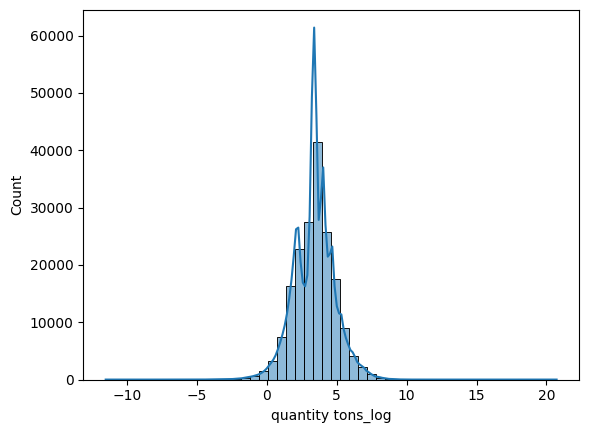

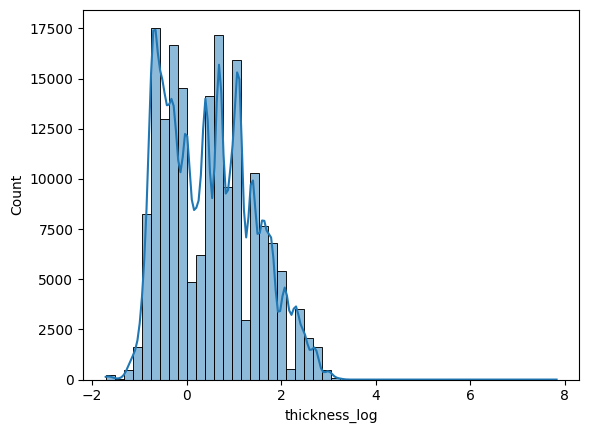

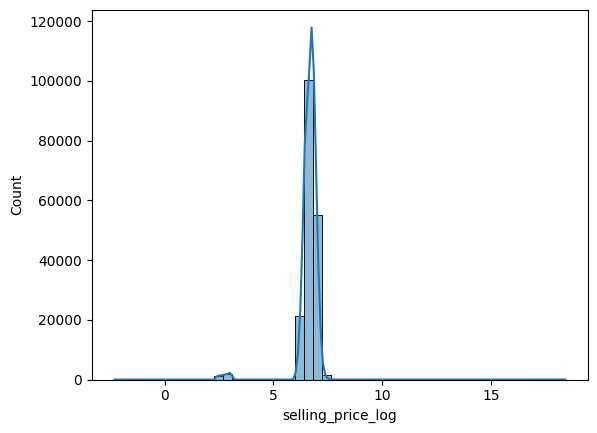

In [17]:
for i in ["quantity tons_log","thickness_log","selling_price_log"]:
    sns.histplot(copper_df1[i],kde=True,bins=50)
    plt.show()

In [18]:
# drop the skewed quantity tons, thickness and selling price columns in dataframe
copper_df1.drop(columns=["quantity tons","thickness", "selling_price"], inplace=True)
copper_df1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105
181671,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,3.413291,-0.162519,6.398595


In [19]:
copper_df1.describe()

,customer,country,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
count,1.816730e+05,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000
mean,3.051221e+07,44.890727,25.614406,1295.286724,4.739679e+08,3.392111,0.480372,6.625890
std,2.433375e+07,24.403034,17.753421,261.631754,7.175101e+08,1.444849,0.933770,0.565391
min,1.245800e+04,25.000000,2.000000,1.000000,6.117280e+05,-11.512925,-1.714798,-2.302585
25%,3.019688e+07,26.000000,10.000000,1180.000000,6.119930e+05,2.395316,-0.356675,6.505784
50%,3.020524e+07,30.000000,15.000000,1250.000000,6.406650e+05,3.413291,0.405465,6.699500
75%,3.028042e+07,78.000000,41.000000,1500.000000,1.332077e+09,4.207084,1.098612,6.859615
max,2.147484e+09,113.000000,99.000000,2990.000000,1.722208e+09,20.723266,7.824046,18.420691


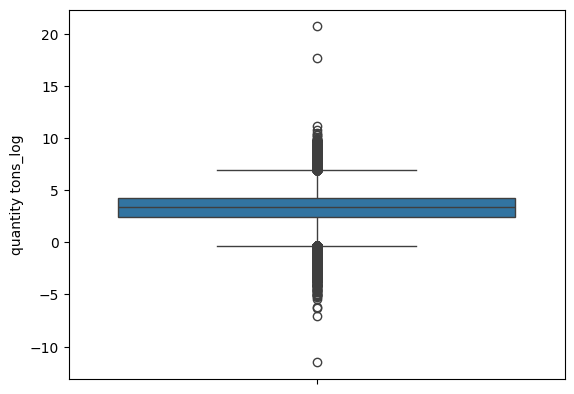

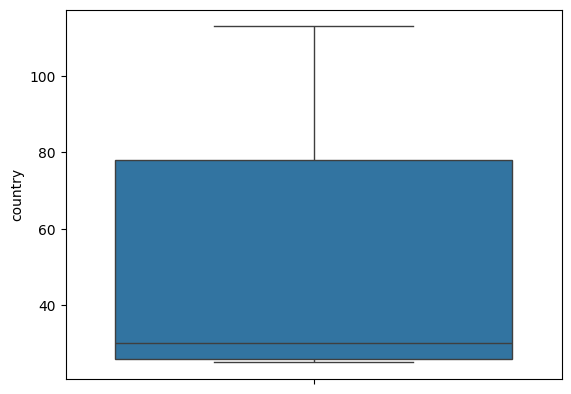

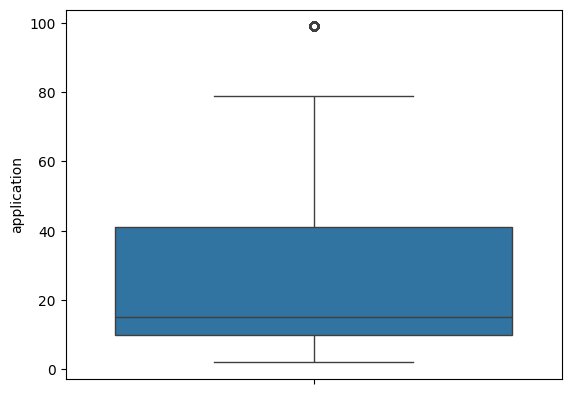

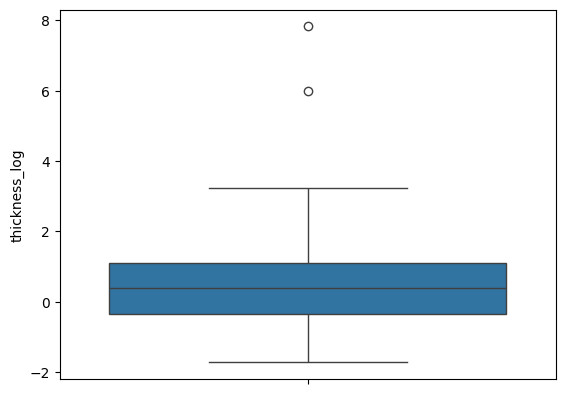

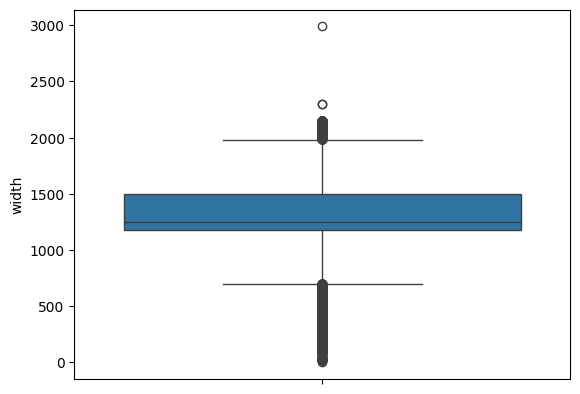

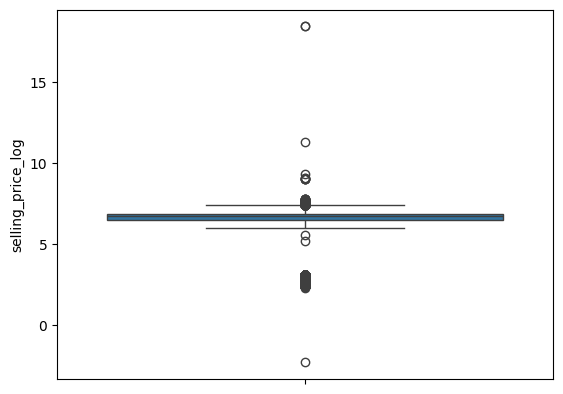

In [20]:
# Finding the outliers
for i in ["quantity tons_log","country","application","thickness_log","width","selling_price_log"]:
    sns.boxplot(copper_df1[i])
    plt.show()


In [21]:
# quantity tons_log,"thickness_log","width","selling_price_log have outliers
copper_df2 = copper_df1.copy()


In [22]:
# Handle these outliers using IQR method and clip the outlier values
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


outlier(copper_df2, 'quantity tons_log')
outlier(copper_df2, 'thickness_log')
outlier(copper_df2, 'selling_price_log')
outlier(copper_df2, 'width')
copper_df2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105
181671,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,3.413291,-0.162519,6.398595


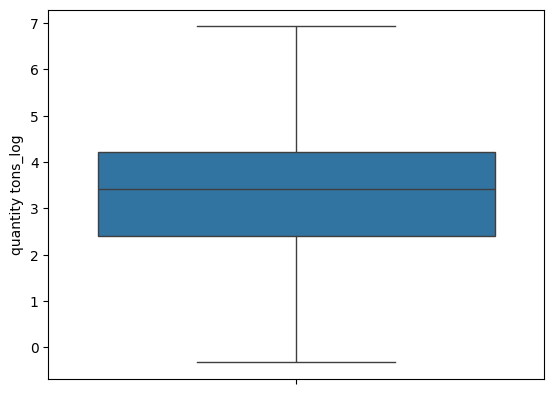

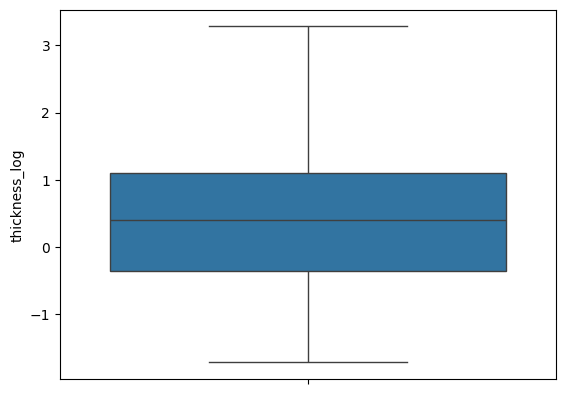

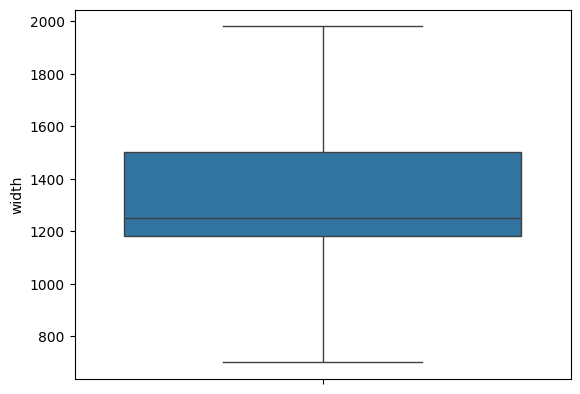

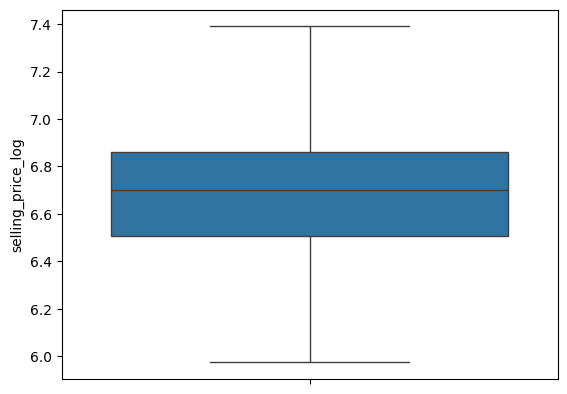

In [23]:
for i in ["quantity tons_log","thickness_log","width","selling_price_log"]:
    sns.boxplot(copper_df2[i])
    plt.show()

In [24]:
copper_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          181673 non-null  object 
 1   customer           181673 non-null  float64
 2   country            181673 non-null  float64
 3   status             181673 non-null  object 
 4   item type          181673 non-null  object 
 5   application        181673 non-null  float64
 6   width              181673 non-null  float64
 7   product_ref        181673 non-null  int64  
 8   delivery date      181673 non-null  object 
 9   quantity tons_log  181673 non-null  float64
 10  thickness_log      181673 non-null  float64
 11  selling_price_log  181673 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.6+ MB


<Axes: >

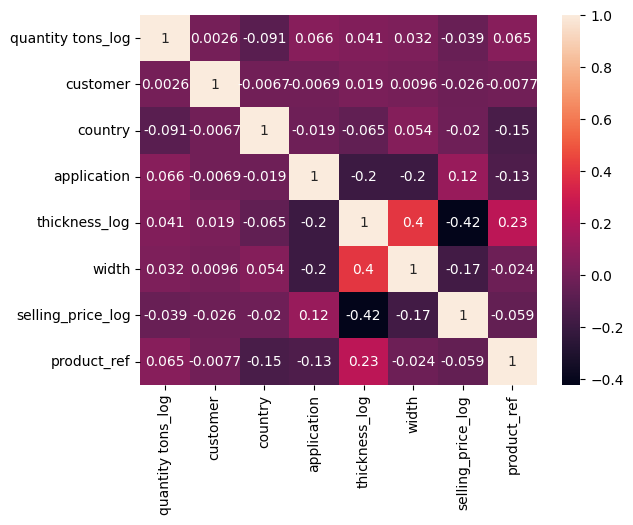

In [25]:
# Checking the correlation between numerical variables
corr= copper_df2[["quantity tons_log","customer","country","application","thickness_log","width","selling_price_log","product_ref"]].corr()
sns.heatmap(corr,annot=True)


In [26]:
# There is no highly correlated columns, so no need to remove columns.

In [27]:
copper_df2.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842


In [28]:
copper_df2.to_csv("Final_df.csv", index=False)

Classification Models - To predict Status

In [29]:
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
import pickle

In [30]:
df_class = copper_df2.copy()
df_class = df_class[df_class["status"].isin(['Won', 'Lost'])]
len(df_class)

150450

In [31]:
df_class["status"].value_counts()

# There is class imbalance in dataset. So we need to handle with SMOTE technique

status
Won     116012
Lost     34438
Name: count, dtype: int64

In [32]:
df_class

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105
181671,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,164141591,2020-07-01,3.413291,-0.162519,6.398595


In [33]:
X = df_class[['customer','country','item type','application','width','product_ref','quantity tons_log','thickness_log','selling_price_log']]
y = df_class['status']

In [34]:
# Convert string labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [36]:
# Encoding categorical variables 
# (sparse_output converts to numpy for easy stacking the encoded colmns with other feature,
#  handle_unknown helpful when test set has categories not present in the training set.)

OHE = OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
X_train_encoded = OHE.fit_transform(X_train[['item type']])
X_test_encoded = OHE.transform(X_test[['item type']])


In [37]:
# Replace categorical column with the encoded version
X_train = np.hstack((X_train[['customer','country','application','width','product_ref','quantity tons_log','thickness_log','selling_price_log']].values, X_train_encoded))
X_test = np.hstack((X_test[['customer','country','application','width','product_ref','quantity tons_log','thickness_log','selling_price_log']].values, X_test_encoded))

In [38]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [42]:
# Train a model using DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [43]:
# Evaluate the model
y_pred_train_dt = dt_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_dt))
y_pred_dt = dt_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Train_accuracy :  1.0
Test_accuracy :  0.9137919574609504
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      6963
           1       0.95      0.93      0.94     23127

    accuracy                           0.91     30090
   macro avg       0.87      0.89      0.88     30090
weighted avg       0.92      0.91      0.91     30090



In [44]:
# Random forest model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_train_rf = rf_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_rf))
y_pred_rf = rf_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Train_accuracy :  0.9999946169995155
Test_accuracy :  0.9325024925224327
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6963
           1       0.96      0.95      0.96     23127

    accuracy                           0.93     30090
   macro avg       0.90      0.91      0.91     30090
weighted avg       0.93      0.93      0.93     30090



In [46]:
# Xgb model
Xgb_model = xgb.XGBClassifier()
Xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred_train_xgb = Xgb_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_xgb))
y_pred_xgb = Xgb_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Train_accuracy :  0.9163643214727889
Test_accuracy :  0.878996344300432
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      6963
           1       0.95      0.89      0.92     23127

    accuracy                           0.88     30090
   macro avg       0.82      0.86      0.84     30090
weighted avg       0.89      0.88      0.88     30090



In [48]:
# Logistic regression model
LR_model = LogisticRegression()
LR_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [49]:
y_pred_train_lr = LR_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_lr))
y_pred_lr = LR_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Train_accuracy :  0.7041072293696506
Test_accuracy :  0.6970754403456297
              precision    recall  f1-score   support

           0       0.41      0.70      0.52      6963
           1       0.89      0.70      0.78     23127

    accuracy                           0.70     30090
   macro avg       0.65      0.70      0.65     30090
weighted avg       0.78      0.70      0.72     30090



In [76]:
# Random Forest model performs well but its overfitting. To avoid overfitting we use hyper parameter tuning

Hyperparameter tuning 

In [64]:
param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [65]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [51]:
rf_model_tun = RandomForestClassifier(max_depth = 20,max_features = 'sqrt', min_samples_leaf = 1,min_samples_split = 2,random_state=42)
rf_model_tun.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=20, random_state=42)

In [53]:
y_pred_t = rf_model_tun.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_t))
y_pred_ts = rf_model_tun.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_ts))
print(classification_report(y_test, y_pred_ts))

Train_accuracy :  0.9772998869569898
Test_accuracy :  0.9162180126287803
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      6963
           1       0.97      0.92      0.94     23127

    accuracy                           0.92     30090
   macro avg       0.87      0.91      0.89     30090
weighted avg       0.92      0.92      0.92     30090



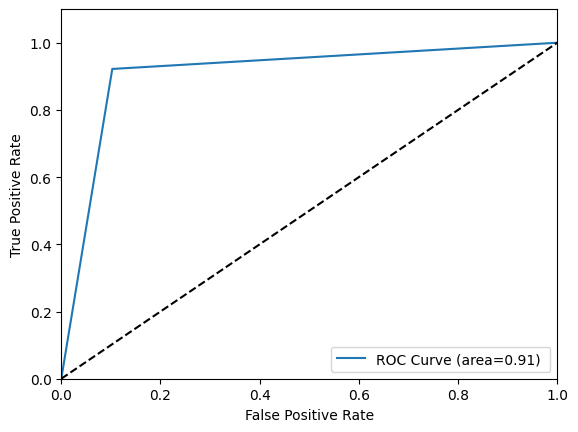

In [54]:
# ROC and AUC
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred_ts)
auc_curve = auc(x=FP, y=TP)

plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Save the encoder
with open('class_encoder.pkl', 'wb') as f:
    pickle.dump(OHE, f)


In [56]:
# Save the scaler
with open('class_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [57]:
# Save the trained model
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(rf_model_tun, f)

Regression model - To predict the selling price

In [141]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [142]:
df_reg = copper_df2.copy()

In [143]:
X = df_reg[['customer','country','item type','application','width','product_ref','quantity tons_log','thickness_log','status']]
y = df_reg['selling_price_log']

In [144]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
OHE_reg = OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
X_train_type = OHE_reg.fit_transform(X_train[['item type']])
X_test_type = OHE_reg.transform(X_test[['item type']])

In [146]:
lb_reg = LabelEncoder()
X_train_s = lb_reg.fit_transform(X_train[['status']]).reshape(-1, 1)
X_test_s = lb_reg.transform(X_test[['status']]).reshape(-1, 1)

In [147]:
# Replace categorical columns with the encoded version
X_train_combined = np.hstack((X_train[['customer','country','application','width','product_ref','quantity tons_log','thickness_log']].values, X_train_type, X_train_s))
X_test_combined = np.hstack((X_test[['customer','country','application','width','product_ref','quantity tons_log','thickness_log']].values, X_test_type, X_test_s))


In [148]:
# Feature Scaling
scaler_reg = StandardScaler()
X_train = scaler_reg.fit_transform(X_train_combined)
X_test = scaler_reg.transform(X_test_combined)

In [149]:
# Train a model using DecisionTree
dtr_model = DecisionTreeRegressor(max_depth = 15,random_state=42)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [150]:
y_pred_train_dtr = dtr_model.predict(X_train)
print("Train_accuracy : ", r2_score(y_train, y_pred_train_dtr))
y_pred_dtr = dtr_model.predict(X_test)
print("Test_accuracy : ", r2_score(y_test, y_pred_dtr))
print("MAE : ", mean_absolute_error(y_test,y_pred_dtr))
print("MSE : ",  mean_squared_error(y_test, y_pred_dtr))


Train_accuracy :  0.713546831198099
Test_accuracy :  0.6421197754476489
MAE :  0.11760602544846718
MSE :  0.02322474043975551


In [114]:
# Random forest regressor
rfr_model = RandomForestRegressor(random_state = 42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [115]:
y_pred_train_rfr = rfr_model.predict(X_train)
print("Train_accuracy : ", r2_score(y_train, y_pred_train_rfr))
y_pred_rfr = rfr_model.predict(X_test)
print("Test_accuracy : ", r2_score(y_test, y_pred_rfr))
print("MAE : ", mean_absolute_error(y_test,y_pred_rfr))
print("MSE : ",  mean_squared_error(y_test, y_pred_rfr))

Train_accuracy :  0.9577989860896836
Test_accuracy :  0.7103068495342542
MAE :  0.10096479763036034
MSE :  0.018799720591317


In [116]:
# XGB Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [117]:
y_pred_train_xgb= xgb_reg.predict(X_train)
print("Train_accuracy : ", r2_score(y_train, y_pred_train_xgb))
y_pred_xgb = xgb_reg.predict(X_test)
print("Test_accuracy : ", r2_score(y_test, y_pred_xgb))
print("MAE : ", mean_absolute_error(y_test,y_pred_xgb))
print("MSE : ",  mean_squared_error(y_test, y_pred_xgb))

Train_accuracy :  0.6762402658627089
Test_accuracy :  0.6542502114558382
MAE :  0.12338432874508456
MSE :  0.02243753229472975


In [103]:
# RandomForest Regressor has better r2 score compared to other models.

In [118]:
# Save the encoder
with open('reg_OHE_encoder.pkl', 'wb') as f:
    pickle.dump(OHE_reg, f)

In [119]:
with open('reg_lb_encoder.pkl', 'wb') as f:
    pickle.dump(lb_reg, f)

In [120]:
# Save the scaler
with open('reg_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_reg, f)

In [121]:
# Save the trained model
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(rfr_model, f)

In [151]:
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search_hyper = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
# grid_search_hyper.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [153]:
# print("Best parameters found: ", grid_search_hyper.best_params_)
# print("Best R^2 score: ", grid_search_hyper.best_score_)

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R^2 score:  0.7017913646192063
